# Analysis of Optimal 2c and 3c Contracts

Table of Contents
- [Setup](#setup)
- [Conflict Deal vs. Optimal Contracts](#conflict-deal-vs-optimal-contracts)
- [Gains of Granularization of Consent and Content Resolutions](#conflict-deal-vs-optimal-contracts)
- [Characteristics of Contracts](#conflict-deal-vs-optimal-contracts)
- [honesty / prefs manigpp.>>???](#conflict-deal-vs-optimal-contracts)


## Setup
In this section dependencies are imported and the csv file generated by the JS script is loaded into a pandas dataframe. Each row is based on a variation of user's and site's preferences for each issue (not on a resolution level!). For each combination, different contracts were calculated, based on a systematic variation of resolutions for consent and content. For a given combination of issue preferences, multiple contracts were calculated, varying in consent resolutions (2, 3, 6) or content resolutions (2/4). For each contract the score is included as a column. 

Assumptions
- Preferences for resolutions (e.g., analytics or 2 EUR) remain same as defined in descriptive analysis

Overview of variables

| Variable            | Description                                                              | Example    |
|---------------------|------------------------------------------------------------|------------|
| `u_cost_rel`        | The relevance score a user gave the issue 'cost'                                                           | 0.2        |
| `u_consent_rel`     | The relevance score a user gave the issue 'consent'                                                        | 0.5        |
| `u_content_rel`     | The relevance score a user gave the issue 'content'                                                        | 0.3        |
| `s_cost_rel`        | The relevance score a site gave the issue 'cost'                                                           | 0.2        |
| `s_consent_rel`     | The relevance score a site gave the issue 'consent'                                                        | 0.5        |
| `s_content_rel`     | The relevance score a site gave the issue 'content'                                                        | 0.3        |
| `score_default`     | The score of the conflict or default deal (cost=0, consent=none, content=50%)                             | 1000       |
| `score_binary_2c`   | The score of the optimal 2c contract (restricted to binary consent and content)                            | 6000       |
| `score_binary_3c`   | The score of the optimal 3c contract (restricted to binary consent and content)                            | 6000       |
| `score_CCC_2c`      | The score of the optimal 2c contract. CCC (Cost, Consent, Content) in numbers from 2 to 5 express the number of resolutions. E.g. a 5 Cost options, 3 Consent options and 2 Content options result in a CCC of 532 | 6000       |
| `score_CCC_3c`      | The score of the optimal 3c contract. Same as above but for 3c contracts                                   | 6000       |
| `consent_CCC_2c`    | The consent granted for the 2c contract of CCC                                                            | analytics personalizedAds |
| `consent_CCC_3c`    | The consent granted for the 3c contract of CCC                                                            | analytics personalizedAds |
| `cost_CCC`          | The agreed cost of 3c contract CCC                                                                        | 2.5        |



In [200]:
#imports
import pandas as pd

# load and present dataset 
df = pd.read_csv('./output.csv')

# csv creating script always puts one unnamed last column. removed here
df.drop(df.columns[-1], axis=1, inplace=True)

# Top 5 Rows for overview of columns and values
df.head()

,u_cost_rel,u_consent_rel,u_content_rel,s_cost_rel,s_consent_rel,s_content_rel,score_default,score_binary_2c,score_binary_3c,score_562_2c,...,score_524_2c,score_524_3c,score_564_2c,score_564_3c,consent_562_2c,consent_532_2c,consent_562_3c,consent_532_3c,cost_562,cost532
0,0.0,0.1,0.9,0.0,0.1,0.9,1969,9000,9000,9025,...,9000,9000,9025,9025,personalizedAds identification,personalizedAds,personalizedAds identification,personalizedAds,1,1
1,0.0,0.1,0.9,0.0,0.2,0.8,1750,9000,9000,9000,...,9000,9000,9000,9000,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,1,1
2,0.0,0.1,0.9,0.0,0.3,0.7,1531,9000,9000,9000,...,9000,9000,9000,9000,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,1,1
3,0.0,0.1,0.9,0.0,0.4,0.6,1313,9000,9000,9000,...,9000,9000,9000,9000,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,1,1
4,0.0,0.1,0.9,0.0,0.5,0.5,1094,9000,9000,9000,...,9000,9000,9000,9000,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,1,1


To determine, which combinations of relevancies lead to the highest relative gains, the relevancies are summarized in one column per user and site. 

- L: relevance <0.3
- M: relevance >=0.3 & <0.5
- H: relevance >=0.5

For example
- input: cost (0.2), consent (0.7), content (0.1) 
- output: LHL

In [201]:
# Create columns to analyze combinations of issue relevancies
def map_relevancy_dec_to_category(value):
    if value < 0.3:
        return 'L'
    elif value <= 0.5:
        return 'M'
    else:
        return 'H'

def map_relevancies_to_string(cost, consent, content):
    cost_string = map_relevancy_dec_to_category(cost)
    consent_string = map_relevancy_dec_to_category(consent)
    content_string = map_relevancy_dec_to_category(content)
    return cost_string + consent_string + content_string

def map_user_relevancies_to_string(row):
    return map_relevancies_to_string(row['u_cost_rel'], row['u_consent_rel'], row['u_content_rel'])

def map_sites_relevancies_to_string(row):
    return map_relevancies_to_string(row['s_cost_rel'], row['s_consent_rel'], row['s_content_rel'])


df['u_issue_rel'] = df.apply(map_user_relevancies_to_string, axis=1)
df['s_issue_rel'] = df.apply(map_sites_relevancies_to_string, axis=1) 

# Print head for verification
df.head()

,u_cost_rel,u_consent_rel,u_content_rel,s_cost_rel,s_consent_rel,s_content_rel,score_default,score_binary_2c,score_binary_3c,score_562_2c,...,score_564_2c,score_564_3c,consent_562_2c,consent_532_2c,consent_562_3c,consent_532_3c,cost_562,cost532,u_issue_rel,s_issue_rel
0,0.0,0.1,0.9,0.0,0.1,0.9,1969,9000,9000,9025,...,9025,9025,personalizedAds identification,personalizedAds,personalizedAds identification,personalizedAds,1,1,LLH,LLH
1,0.0,0.1,0.9,0.0,0.2,0.8,1750,9000,9000,9000,...,9000,9000,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,1,1,LLH,LLH
2,0.0,0.1,0.9,0.0,0.3,0.7,1531,9000,9000,9000,...,9000,9000,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,1,1,LLH,LMH
3,0.0,0.1,0.9,0.0,0.4,0.6,1313,9000,9000,9000,...,9000,9000,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,1,1,LLH,LMH
4,0.0,0.1,0.9,0.0,0.5,0.5,1094,9000,9000,9000,...,9000,9000,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,analytics marketing personalizedContent person...,analytics personalizedAds externalContent,1,1,LLH,LMM


## Conflict Deal vs. Optimal Contracts

Objective: 
- Are all Nash contracts (2c or 3c) better (higher scores) than the default/conflict deal?

Input Parameters:

- `score_default`

- `nash_score`: score_binary_2c, score_binary_3c, score_CCC_2c, score_CCC_3c

Metrics:

- `gain` = $\frac{\text{score\_default}}{\text{nash\_score}}$

In [202]:
# Any contract should be better than the default/conflict deal
score_columns = ['score_binary_2c', 'score_binary_3c', 'score_562_2c', 'score_562_3c',
                 'score_532_2c', 'score_532_3c', 'score_524_2c', 'score_524_3c',
                 'score_564_2c', 'score_564_3c']

# Find the minimum value in each row for the selected columns
min_score = df[score_columns].min(axis=1)

# Calculate the result by dividing each minimum value by the corresponding value in the 'score_default' column
gain_ratios = min_score / df['score_default']

# Calc descriptive statistics
gain_ratios.describe().to_frame()


,0
count,1681.000000
mean,8.817427
std,9.660702
min,2.132196
25%,3.477051
50%,5.483625
75%,10.124334
max,101.449275


Observations
- Any optimal contract (no matter if 2c or 3c) is better than the conflict deal (0 EUR, Rejected All, 50% Content)
- Median gain is ~550%
- Minimal gain is >200%

# Gains of Granularization of Consent and Content Resolutions

As seen in the descriptive analysis, consent and content are mostly resolved binarily in accept/reject all or full/restricted access. The proposed protocol allows a granularization of these resolutions with six consent options (analytics, marketing, personalizedAds, personalizedContent, externalContent, identification) and any content resolution in percent of all available content. This section compares the binary contracts with the more granular options and answers, if the granularization leads to better deals.

Objective: 
- Does the granularization of consent and content resolutions lead to better deals compared to binary resolutions?
- Which combination of issue relevancies create the best deals?

Input Parameters
| Input Parameter          | Description                     | Type    |
|---------------------------|---------------------------------|---------|
| `Binary Scores`             | Scores from binary contracts  | Number  |
| `Granular Scores`           | Scores from granular contracts | Number  |


Metrics
      

| Metric                                   | Description                                       | Type           | Column         |
|-------------------------------------------|-------------------------------------------------------------------------|----------------|----------|
| `Absolute Difference (points)`             | granular score - binary score                                            | Category of <i>0, 1to100, 101to500, 501to1000, 1001to2000, greaterThan2000 </i>   | abs_CCC_2c, abs_CCC_3c |
|`Relative Difference (%)`                  | absolute difference / binary score                           | Decimal Number | rel_CCC_2c, rel_CCC_3c |


### Preparation
Calculating and adding the necessary columns to the dataframe.

In [203]:
# Copy for gains analysis
gains_df = df.iloc[:,6:].copy()
# Create additional columns
gains_df['diff_562_2c'] = gains_df['score_562_2c'] - gains_df['score_binary_2c']
gains_df['diff_562_3c'] = gains_df['score_562_3c'] - gains_df['score_binary_3c']

gains_df['diff_532_2c'] = gains_df['score_532_2c'] - gains_df['score_binary_2c']
gains_df['diff_532_3c'] = gains_df['score_532_3c'] - gains_df['score_binary_3c']

gains_df['diff_524_2c'] = gains_df['score_524_2c'] - gains_df['score_binary_2c']
gains_df['diff_524_3c'] = gains_df['score_524_3c'] - gains_df['score_binary_3c']

gains_df['diff_564_2c'] = gains_df['score_564_2c'] - gains_df['score_binary_2c']
gains_df['diff_564_3c'] = gains_df['score_564_3c'] - gains_df['score_binary_3c']

# function to calculate the absolute difference range
def get_diff_abs(diff):
    if diff == 0:
        return "0"
    elif 0 < diff <= 100:
        return "1to100"
    elif 100 < diff <= 500:
        return "101to500"
    elif 500 < diff <= 1000:
        return "501to1000"
    elif 1000 < diff <= 2000:
        return "1001to2000"
    elif diff > 2000:
        return "greaterThan2000"
    else:
        return "invalid"

# Calculate absolute difference ranges
gains_df['abs_562_2c'] = gains_df['diff_562_2c'].apply(get_diff_abs)
gains_df['abs_562_3c'] = gains_df['diff_562_3c'].apply(get_diff_abs)

gains_df['abs_532_2c'] = gains_df['diff_532_2c'].apply(get_diff_abs)
gains_df['abs_532_3c'] = gains_df['diff_532_3c'].apply(get_diff_abs)

gains_df['abs_524_2c'] = gains_df['diff_524_2c'].apply(get_diff_abs)
gains_df['abs_524_3c'] = gains_df['diff_524_3c'].apply(get_diff_abs)

gains_df['abs_564_2c'] = gains_df['diff_564_2c'].apply(get_diff_abs)
gains_df['abs_564_3c'] = gains_df['diff_564_3c'].apply(get_diff_abs)

# function to calculate the relative difference 
def get_diff_rel(diff):
    return 
# Calculate the relative difference
#df['diff_2c_rel'] = round(df['diff_2c']/df['score_binary_2c'],3)
#df['diff_3c_rel'] = round(df['diff_3c']/df['score_binary_3c'],3)
gains_df['rel_562_2c'] = round(gains_df['diff_562_2c']/gains_df['score_binary_2c'],3)
gains_df['rel_562_3c'] = round(gains_df['diff_562_3c']/gains_df['score_binary_3c'],3)

gains_df['rel_532_2c'] = round(gains_df['diff_532_2c']/gains_df['score_binary_2c'],3)
gains_df['rel_532_3c'] = round(gains_df['diff_532_3c']/gains_df['score_binary_3c'],3)

gains_df['rel_524_2c'] = round(gains_df['diff_524_2c']/gains_df['score_binary_2c'],3)
gains_df['rel_524_3c'] = round(gains_df['diff_524_3c']/gains_df['score_binary_3c'],3)

gains_df['rel_564_2c'] = round(gains_df['diff_564_2c']/gains_df['score_binary_2c'],3)
gains_df['rel_564_3c'] = round(gains_df['diff_564_3c']/gains_df['score_binary_3c'],3)


# Display the DataFrame (which will be rendered as a table)
gains_df.head()

,score_default,score_binary_2c,score_binary_3c,score_562_2c,score_562_3c,score_532_2c,score_532_3c,score_524_2c,score_524_3c,score_564_2c,...,abs_564_2c,abs_564_3c,rel_562_2c,rel_562_3c,rel_532_2c,rel_532_3c,rel_524_2c,rel_524_3c,rel_564_2c,rel_564_3c
0,1969,9000,9000,9025,9025,9025,9025,9000,9000,9025,...,1to100,1to100,0.003,0.003,0.003,0.003,0.0,0.0,0.003,0.003
1,1750,9000,9000,9000,9000,9000,9000,9000,9000,9000,...,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000
2,1531,9000,9000,9000,9000,9000,9000,9000,9000,9000,...,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000
3,1313,9000,9000,9000,9000,9000,9000,9000,9000,9000,...,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000
4,1094,9000,9000,9000,9000,9000,9000,9000,9000,9000,...,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000


### Absolute Gains
Results summarized in a table holding contracts and the counts per category.

In [204]:

abs_gains_df = pd.DataFrame()

abs_gains_df['abs_distribution'] = ['0', '1to100', '101to500', '501to1000', '1001to2000', "greaterThan2000"]

# Iterate over each column name
for column_name in ['abs_562_2c', 'abs_562_3c', 'abs_532_2c', 'abs_532_3c', 'abs_524_2c', 'abs_524_3c', 'abs_564_2c', 'abs_564_3c',  ]:
    values = gains_df[column_name].value_counts().values
    if (values.size == 1):
        values = [values[0], 0, 0 ,0, 0, 0]
    elif(values.size == 5):
        values = values[0].append(0)

    abs_gains_df[column_name] = values

# Display the resulting DataFrame
abs_gains_df

,abs_distribution,abs_562_2c,abs_562_3c,abs_532_2c,abs_532_3c,abs_524_2c,abs_524_3c,abs_564_2c,abs_564_3c
0,0,1171,1182,1171,1189,1681,1681,1171,1182
1,1to100,236,241,259,261,0,0,236,241
2,101to500,200,198,178,171,0,0,200,198
3,501to1000,60,46,59,47,0,0,60,46
4,1001to2000,13,13,13,12,0,0,13,13
5,greaterThan2000,1,1,1,1,0,0,1,1


Observations:
- most negotiations gained zero points 
- 236 to 261 have small gains from one to 100 points
- 171 to 200 have gains from 100 to 500 points
- very little (~13) have gains between 1000 and 2000
- an outlier seems to exist in every case
- <span style="color: red;">abs_524_2c abs_564_2c are empty</span>
- <span style="color: red;">abs_564_2c abs_564_3c are same as abs_562_2c abs_562_3c</span>

Interpretation:
- granularization has a small impact on the contract scores
- <span style="color: red;">Both user and site prefer the content resolution of 100% (unrestricetd access). Because there's no actual space for trade-offs, the best contract always contains the best content option. </span>
- <span style="color: red;">Granularization of content options is pointless </span>



### Relative Gains
Results summarized in a table holding contracts and the counts per category.

In [205]:
# distribution of absolute differences

rel_gains_df = pd.DataFrame()

rel_gains_df['rel_distribution'] = ['Mean', 'Standard Deviation', 'Minimum', '25th Percentile', 'Median', "75th Percentile", "90th Percentile", "95th Percentile", "Maximum"]

# Iterate over each column name
for column_name in ['rel_562_2c', 'rel_562_3c', 'rel_532_2c', 'rel_532_3c', 'rel_524_2c', 'rel_524_3c', 'rel_564_2c', 'rel_564_3c',  ]:
    mean = round(gains_df[column_name].mean(), 3)
    std = round(gains_df[column_name].std(), 3)
    min = round(gains_df[column_name].min(), 3)
    q25 = round(gains_df[column_name].quantile(0.25), 3)
    median = round(gains_df[column_name].median(), 3)
    q75 = round(gains_df[column_name].quantile(0.75), 3)
    q90 = round(gains_df[column_name].quantile(0.90), 3)
    q95 = round(gains_df[column_name].quantile(0.95), 3)
    max = round(gains_df[column_name].max(), 3)

    # add column
    rel_gains_df[column_name] = [mean, std, min, q25, median, q75, q90, q95, max]

# Display the resulting DataFrame
rel_gains_df

,rel_distribution,rel_562_2c,rel_562_3c,rel_532_2c,rel_532_3c,rel_524_2c,rel_524_3c,rel_564_2c,rel_564_3c
0,Mean,0.028,0.019,0.028,0.018,0.0,0.0,0.028,0.019
1,Standard Deviation,0.109,0.083,0.109,0.082,0.0,0.0,0.109,0.083
2,Minimum,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000
3,25th Percentile,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000
4,Median,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000
5,75th Percentile,0.006,0.003,0.006,0.002,0.0,0.0,0.006,0.003
6,90th Percentile,0.066,0.041,0.064,0.038,0.0,0.0,0.066,0.041
7,95th Percentile,0.143,0.095,0.143,0.088,0.0,0.0,0.143,0.095
8,Maximum,2.025,2.025,2.025,2.025,0.0,0.0,2.025,2.025


Observations:
- First improvements observed in the 75th percentile 
- All seem to have the same maximum outlier, probably leveraging the mean
- rel_524_2c, rel_524_3c show no improvement
- min ~10% improvement in 95th percentile

Since all seem to have the same outlier, the following table provides insights into the respective user and site prefernces:

In [206]:
# Relation between prioritization of issues (relevancies) and relative gains

# Which combination creates the outlier of over 200% relative gains?
gains_df[gains_df['rel_562_2c'] > 2][['u_issue_rel', 's_issue_rel']]


,u_issue_rel,s_issue_rel
336,LHL,LHL


Observations:
- The outlier is based on extreme interest in consent

Interpretation:
- When both user and site only care about privacy/consent and not about content or cost, this happens

### Impact of Relevancies on Relative Gains


#### Users

In [207]:
# Which combination of user relavancies creates the highest (90th percentile) relative gains?
# EXCLUDE: rel_524_2c, rel_524_3c, because no gains
rel_columns = ['rel_562_2c', 'rel_562_3c', 'rel_532_2c', 'rel_532_3c', 'rel_564_2c', 'rel_564_3c']

result_df = pd.DataFrame()

for column_name in rel_columns:
    # Calculate the 90th percentile value
    top_ten_percentile_value = gains_df[column_name].quantile(0.9)
    
    top_percentile_df = gains_df[gains_df[column_name] > top_ten_percentile_value][['u_issue_rel']]
    
    counts = top_percentile_df['u_issue_rel'].value_counts()
    
    result_df[column_name] = counts

result_df

,rel_562_2c,rel_562_3c,rel_532_2c,rel_532_3c,rel_564_2c,rel_564_3c
LHL,71,44,70,44,71,44
LHM,46,32,44,32,46,32
LMM,25,36,25,38,25,36
MML,18,41,18,38,18,41
LMH,2,6,2,6,2,6
MMM,2,9,2,8,2,9


Observations:
- LHL, LHM, LMM and MML are the most common combinations of user relevancies
- LMH and MMM are already far less common
- in the most and secondmost common (LHL, LHM) consent preferences are H (high) or at least 0.5
- in the most common combinations, consent preferences are always >L or M/H

Interpretation:
- The top four combinations occur for extremly privacy concerned users, that care more about their consent than about cost and content combined

#### Sites

In [208]:
# Which combination of sites relavancies creates the highest (90th percentile) relative gains?
# EXCLUDE: rel_524_2c, rel_524_3c, because no gains
rel_columns = ['rel_562_2c', 'rel_562_3c', 'rel_532_2c', 'rel_532_3c', 'rel_564_2c', 'rel_564_3c']

result_df = pd.DataFrame()

for column_name in rel_columns:
    top_ten_percentile_value = gains_df[column_name].quantile(0.9)
    
    top_percentile_df = gains_df[gains_df[column_name] > top_ten_percentile_value][['s_issue_rel']]
    
    counts = top_percentile_df['s_issue_rel'].value_counts()
    
    result_df[column_name] = counts

result_df

,rel_562_2c,rel_562_3c,rel_532_2c,rel_532_3c,rel_564_2c,rel_564_3c
MML,39,24.0,39,26.0,39,24.0
LHL,37,50.0,34,46.0,37,50.0
LMM,28,45.0,28,44.0,28,45.0
LHM,23,37.0,23,37.0,23,37.0
MMM,15,8.0,15,8.0,15,8.0
HLL,10,NaN,10,NaN,10,NaN
LMH,6,4.0,6,5.0,6,4.0
MLM,6,NaN,6,NaN,6,NaN


Observations:
- as for the user LHL, LHM, LMM and MML are the most common combinations of user relevancies
- the other combinations are less common
- in the most common combinations, consent preferences are always >L or M/H

Interpretation:
- The top four combinations occur when a site is way more interested in consent, than granting content or getting to some cost

# Characteristics of Contracts
Objective: 
- Cost in 3C contracts: 
  - Which are the most common outcomes?
  - Which combination of issues lead to which outcome?
- Consent or **Privacy Friendliness**
  - Which are the most common outcomes?
  - Which combination of issues lead to which outcome?
- Content is not relevant, it will always be 100% (s. above)

Input Parameters

- `consent_562_2c`       
- `consent_532_2c`        
- `consent_562_3c`        
- `consent_532_3c`    
      
Metrics
- count of consent (categorical) and cost (numeric) resolutions
- relation of issues and cost/consent


### Consent

#### Preparation

**Goal**: compare consent given when 3 or 6 options are available

**Problem**: Currently either 3 or 6 options represent 100% or fully accepted consent

**Solution**: Modify the columns to show percentages, 'ACCEPT_ALL' or 'REJECTED'

In [209]:

for name in ['consent_562_2c', 'consent_532_2c', 'consent_562_3c', 'consent_532_3c']:
    df[name].fillna('0', inplace=True)

consent_options = 6

for name in ['consent_562_2c', 'consent_562_3c']:
    df[name] = df[name].apply(lambda value: 0 if value == '0' else(round(len(value.split())/consent_options*100,2)))
    df[name] = df[name].apply(lambda value: 'ACCEPT_ALL' if value == 100.0 else ('REJECTED' if value == 0.0 else value))

consent_options = 3

for name in ['consent_532_2c', 'consent_532_3c']:
    df[name] = df[name].apply(lambda value: 0 if value == '0' else(round(len(value.split())/consent_options*100,2)))
    df[name] = df[name].apply(lambda value: 'ACCEPT_ALL' if value == 100.0 else ('REJECTED' if value == 0.0 else value))

df[['consent_562_2c', 'consent_532_2c', 'consent_562_3c', 'consent_532_3c']].head()

,consent_562_2c,consent_532_2c,consent_562_3c,consent_532_3c
0,33.33,33.33,33.33,33.33
1,ACCEPT_ALL,ACCEPT_ALL,ACCEPT_ALL,ACCEPT_ALL
2,ACCEPT_ALL,ACCEPT_ALL,ACCEPT_ALL,ACCEPT_ALL
3,ACCEPT_ALL,ACCEPT_ALL,ACCEPT_ALL,ACCEPT_ALL
4,ACCEPT_ALL,ACCEPT_ALL,ACCEPT_ALL,ACCEPT_ALL


#### Visual Overview
Merge the value counts and create a heatmap to visualize relative occurences of consent resolutions in 2c and 3c mode.

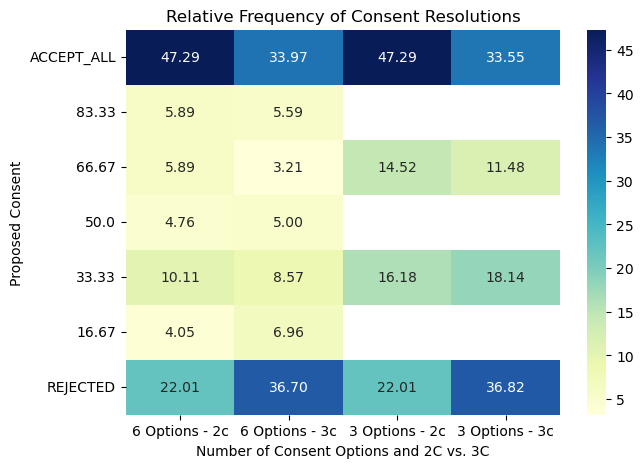

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
counts_df = pd.DataFrame()
total_rows = df.shape[0]

for name in ['consent_562_2c', 'consent_562_3c', 'consent_532_2c', 'consent_532_3c']:

    # Get value counts for the current column
    counts = df[name].value_counts()

    # Calculate percentage of occurrences relative to all cases
    percentages = round((counts / total_rows) * 100, 2)

    # Add percentage column
    counts_df[name] = percentages

# Set col names
counts_df.columns = [ '6 Options - 2c', '6 Options - 3c', '3 Options - 2c', '3 Options - 3c']
# Change order of y-axis elements
counts_df = counts_df.reindex(['ACCEPT_ALL',83.33,   66.67,50.0,  33.33, 16.67,'REJECTED'])

# Create the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(counts_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Relative Frequency of Consent Resolutions")
plt.xlabel("Number of Consent Options and 2C vs. 3C")
plt.ylabel("Proposed Consent")
plt.show()


Observations:
- 2C vs. 3C:
  - in 2C full consent (ACCEPT_ALL) is proposed in 50% of cases
  - in 3C rejected consent (REJECTED) is proposed more likely than full consent
  - in 2C >=50% consent is proposed in >60% of cases
  - in 3C >=50% consent is proposed in >40% of cases
- 6 vs. 3 consent options:
  - none
- others:
  - between ACCEPT_ALL and REJECTED, no big diferences in occurences. However 33.33% is always more likely than 66.67%. 

Interpretatio:
- If privacy friednliness was defined as rejected consent, then this would only be proposed in 22 or 36 percent of cases.
- Proposed consent mainly depends on 2C or 3C and consequently on the cost issue 
- Number of consent options doesnt influence results significantly   

#### Consent and Issue Relevancies
Differences mainly depend on the 2c or 3c, not on the number of consent resolutions. Therefore only two columns, one for 2c and one for 3c, are relevant in this analysis:
- `consent_562_2c`       
- `consent_562_3c`



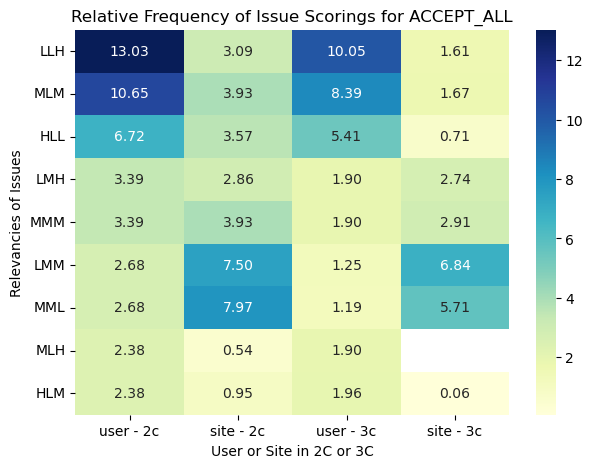

In [229]:
# Which combination of sites relavancies creates leads to which ACCEPTED consent?
result_df = pd.DataFrame()

total_rows = df.shape[0]


for column_name in ['consent_562_2c', 'consent_562_3c']:
    filtered_df = df[df[column_name]=='ACCEPT_ALL']

    counts_user = filtered_df['u_issue_rel'].value_counts()
    counts_site = filtered_df['s_issue_rel'].value_counts()

    # Calculate percentage of occurrences relative to all cases
    percentages_user = round((counts_user / total_rows) * 100, 2)
    percentages_site = round((counts_site / total_rows) * 100, 2)

    result_df[column_name+'_u'] = percentages_user
    result_df[column_name+'_s'] = percentages_site

result_df.columns = [ 'user - 2c', 'site - 2c', 'user - 3c', 'site - 3c']
result_df

plt.figure(figsize=(7, 5))
sns.heatmap(result_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Relative Frequency of Issue Scorings for ACCEPT_ALL")
plt.xlabel("User or Site in 2C or 3C")
plt.yticks(rotation=0)
plt.ylabel("Relevancies of Issues")
plt.show()

Comment:
- for 2c negotiations the aggregation like _CC is missing, since cost relevance is not relevant in this case
- however tendencies can already be observed

Observations:
- User: low consent relevance in ~30% (2c) or ~25% (3c) of cases
- Site: mid consent relevance is strongest tendency, however still very weak (<15%)
- **if the relevance of consent is set to high (>0.5), then 100% consent will NOT be proposed**

Interpretation
- To obtain more consent, sites can increase it's relevance
- To grant less consent, users can increase it's relevance 

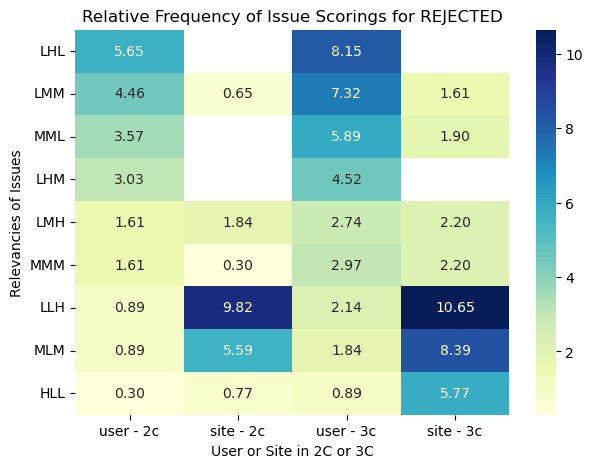

In [230]:
# Which combination of sites relavancies creates leads to which ACCEPTED consent?
result_df = pd.DataFrame()

total_rows = df.shape[0]


for column_name in ['consent_562_2c', 'consent_562_3c']:
    filtered_df = df[df[column_name]=='REJECTED']

    counts_user = filtered_df['u_issue_rel'].value_counts()
    counts_site = filtered_df['s_issue_rel'].value_counts()

    # Calculate percentage of occurrences relative to all cases
    percentages_user = round((counts_user / total_rows) * 100, 2)
    percentages_site = round((counts_site / total_rows) * 100, 2)

    result_df[column_name+'_u'] = percentages_user
    result_df[column_name+'_s'] = percentages_site

result_df.columns = [ 'user - 2c', 'site - 2c', 'user - 3c', 'site - 3c']
result_df

plt.figure(figsize=(7, 5))
sns.heatmap(result_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Relative Frequency of Issue Scorings for REJECTED")
plt.xlabel("User or Site in 2C or 3C")
plt.yticks(rotation=0)
plt.ylabel("Relevancies of Issues")
plt.show()

Comment:
- for 2c negotiations the aggregation like _CC is missing, since cost relevance is not relevant in this case
- however tendencies can already be observed

Observations:
- User: REJECTED consent more probrable for high consent relevance
- Site: REJECTED consent more probable for low consent relevance

Interpretation
- To obtain more consent, sites can increase it's relevance
- To grant less consent, users can increase it's relevance 

### Cost

##### Commonness
Which cost proposals are the most common ones?
Differences between 3 and 6 consent options?

In [242]:
col_names =  'cost_562', 'cost532',

for name in col_names:
    df[name].fillna('ZERO', inplace=True)
    
print('6 consent options (%):')
print(round(df['cost_562'].value_counts()/total_rows*100,2))


print('\n3 consent options (%):')
print(round(df['cost532'].value_counts()/total_rows*100,2))


6 consent options (%):
1     58.77
20    28.38
6     12.85
Name: cost_562, dtype: float64

3 consent options (%):
1     58.60
20    28.49
6     12.91
Name: cost532, dtype: float64


Observations
- In no 3C negotiation the optimal contract holds a cost of 0
- Number of cost resolutions (3 or 6) doesn't make a difference
- 58% of proposals hold a cost o 1
- **A cost o 12 (although existing) was never proposed**
- a proposal of 20 is more than twice as probable as 6

Limitations
- Heavily depend on specific user preferences (Willingness-to-Pay)

Interpretation
- **Although the user set is prefrence for 20 Eur to 0 (!), 20 is the secondmost common cost propsal in 3C contracts**

##### Cost and Issue Relevancies